## QLIPP CALIBRATION NOTEBOOK

In [1]:
import time
import os, sys
from pycromanager import Bridge

p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)
import numpy as np
from recOrder.recOrder.calib.Calibration import QLIPP_Calibration
from recOrder.recOrder.calib.CoreFunctions import snap_image

In [2]:
bridge = Bridge(convert_camel_case=False)
mmc = bridge.get_core()
mm = bridge.get_studio()

calib = QLIPP_Calibration()
calib.mmc = mmc
calib.mm = mm
calib.print_details = True

### Notes Before you begin:

* Choose a field of view with no sample for calibration
* Decide whether you want a 4-State Scheme (faster) or a 5-State Scheme (slower, slightly more sensitive?)

Calculating Blacklevel ...
Blacklevel: 103.21783698797226

Calibrating State0 (Extinction)...

Starting first grid search, step = 0.1
update (65535.000000, 0.010000, 0.250000)
update (65534.966844, 0.010000, 0.350000)
update (57939.751749, 0.010000, 0.450000)
update (48164.228514, 0.010000, 0.550000)
update (35786.483228, 0.110000, 0.550000)
update (32231.053090, 0.210000, 0.450000)
update (10230.511825, 0.210000, 0.550000)
update (6074.124360, 0.310000, 0.550000)
update (4862.712894, 0.310000, 0.650000)
coarse search done
better lca = 0.31000000000000005
better lcb = 0.6499999999999999
better int = 4862.7128937244415
grid search done
lca = 0.31000000000000005
lcb = 0.6499999999999999
intensity = 4862.7128937244415

Starting fine search
iteration: 1
	Optimize lca ...
	lca = 0.28639
	lcb = 0.65000
	Intensity = 4362.744752645493
	Intensity Difference = 4126.7353008%

	Optimize lcb ...
	lca = 0.28640
	lcb = 0.58793
	Intensity = 977.5597925186157
	Intensity Difference = 847.0841679%
iterat

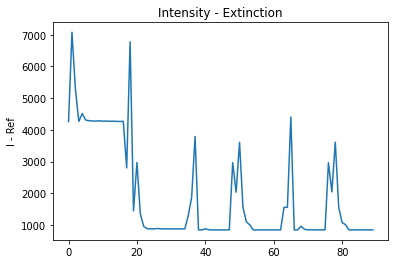

--------done--------


Calibrating State1 (I0)...
setting LCA = 0.2316
setting LCB = 0.5879


Intensity = 4146.996833562851
--------done--------

Calibrating State2 (I60)...
iteration: 1
	Optimizing lca w/ constrained lcb ...
	lca = 0.29767
	lcb = 0.55909
	Intensity = 4148.415543079376
	Intensity Difference = 0.0342105%
iteration: 2
	Optimizing lca w/ constrained lcb ...
	lca = 0.29767
	lcb = 0.55908
	Intensity = 4150.458479166031
	Intensity Difference = 0.0834736%
iteration: 3
	Optimizing lca w/ constrained lcb ...
	lca = 0.29770
	lcb = 0.55904
	Intensity = 4156.181481599808
	Intensity Difference = 0.2214771%
iteration: 4
	Optimizing lca w/ constrained lcb ...
	lca = 0.29764
	lcb = 0.55914
	Intensity = 4161.45458984375
	Intensity Difference = 0.3486320%
iteration: 5
	Optimizing lca w/ constrained lcb ...
	lca = 0.29769
	lcb = 0.55905
	Intensity = 4154.518985033035
	Intensity Difference = 0.1813879%
Exceeded 5 Iterations: Search discontinuing
Lowest Inten: [1.41870952], lca = [0.297665

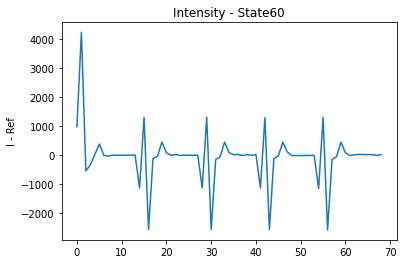

--------done--------

Calibrating State3 (I120)...

iteration: 1
	Optimizing lca w/ constrained lcb ...
	lca = 0.30908
	lcb = 0.63717
	Intensity = 4147.5924253463745
	Intensity Difference = 0.0143620%
iteration: 2
	Optimizing lca w/ constrained lcb ...
	lca = 0.30905
	lcb = 0.63712
	Intensity = 4147.789454698563
	Intensity Difference = 0.0191131%
iteration: 3
	Optimizing lca w/ constrained lcb ...
	lca = 0.30929
	lcb = 0.63755
	Intensity = 4156.987084388733
	Intensity Difference = 0.2409033%
iteration: 4


In [ ]:
%%time

calibration_scheme = '4-State Extinction'
# calibration_scheme = '5-State'
swing = 0.05
wavelength = 546
use_full_FOV = True
method = 'brent'

meta_dir = 'Q:\\Cameron\\Calibration_Testing\\'

# Run Calibration
calib.run_calibration(calibration_scheme, options=(swing, wavelength, meta_dir, method, use_full_FOV))

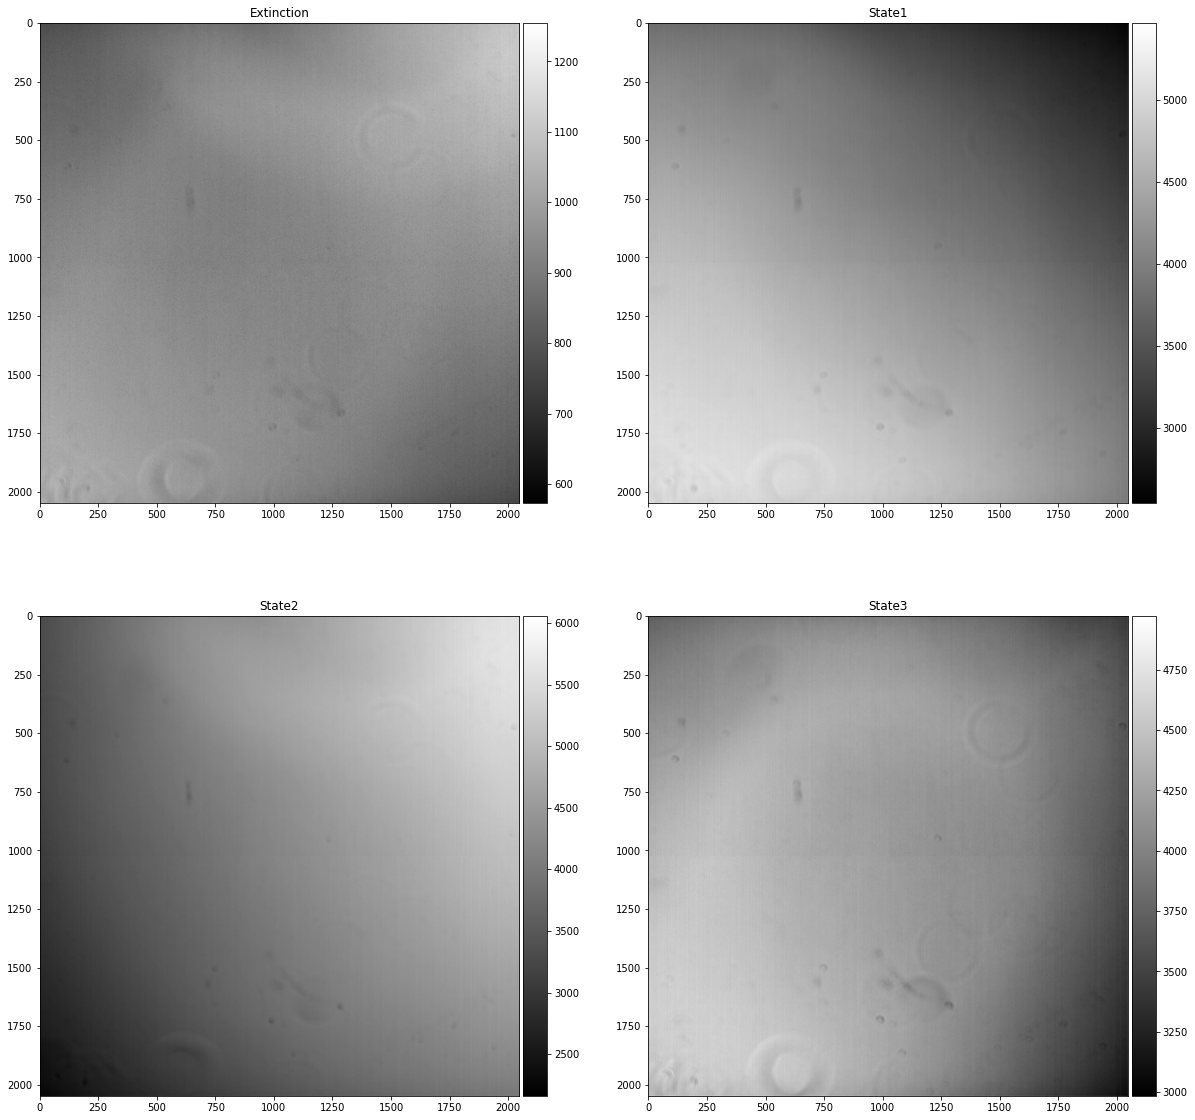

In [5]:
## Take set of BG Images

directory = 'Q:\\Cameron\\Calibration_Testing\\BG_Test\\'

n_avg = 8

if calibration_scheme == '5-State':
    calib.capture_bg(n_avg, 5, directory)

elif calibration_scheme == '4-State Extinction':
    calib.capture_bg(n_avg, 4, directory)